In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df = pd.read_csv(r'C:\Users\muppa\Downloads\admission_predict.csv')

In [3]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [10]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [11]:
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [12]:
df = df.rename(columns = {'Chance of Admit ':'Probability'})
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


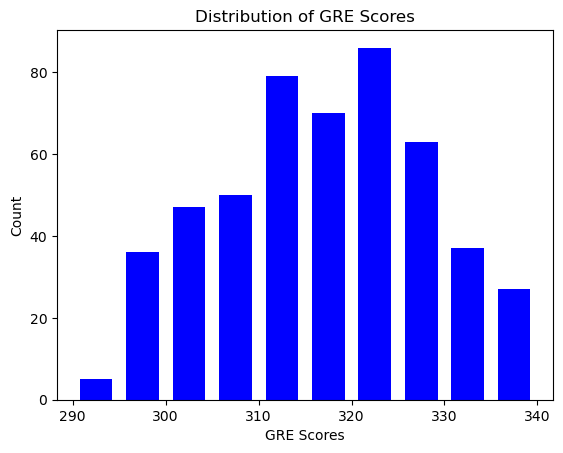

In [13]:
fig  =  plt.hist(df['GRE Score'], rwidth = 0.7, color = 'blue')
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.title('Distribution of GRE Scores')
plt.show()

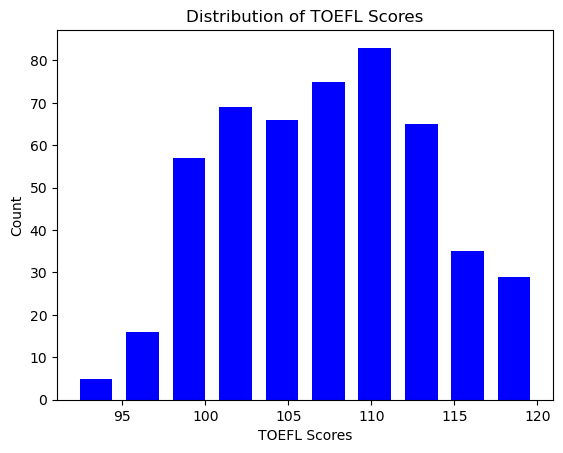

In [14]:

# Assuming you have a dataframe named 'df' as in the previous code

fig = plt.hist(df['TOEFL Score'], rwidth=0.7, color='blue')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.title('Distribution of TOEFL Scores')
plt.show()

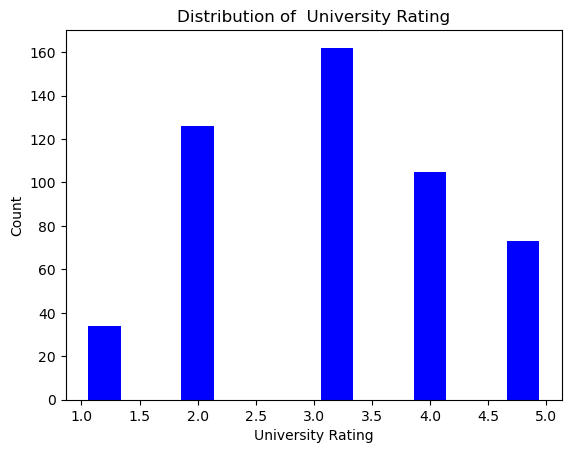

In [15]:
# Analyze the relationship between university rating and the chance of admission
fig = plt.hist(df['University Rating'], rwidth=0.7, color='blue')
plt.title('Distribution of  University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

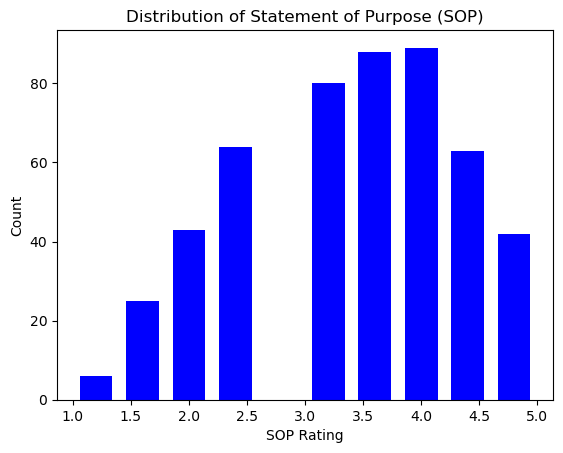

In [16]:
# Analyze the relationship between SOP and the chance of admission
fig = plt.hist(df['SOP'], rwidth=0.7, color='blue')
plt.title('Distribution of Statement of Purpose (SOP)')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

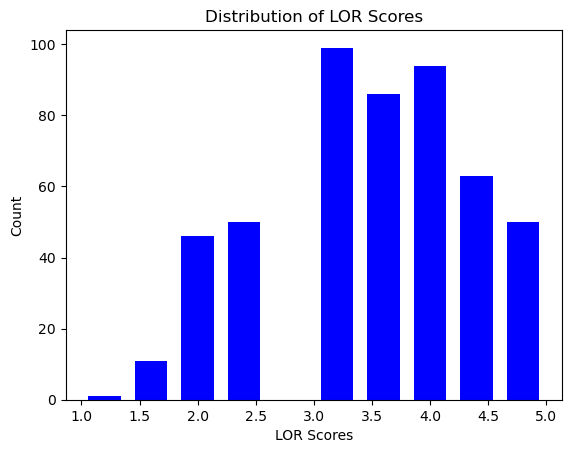

In [17]:
# Distribution of LOR
plt.hist(df['LOR '], rwidth=0.7, color='blue') # Note the space in 'LOR '
plt.xlabel('LOR Scores')
plt.ylabel('Count')
plt.title('Distribution of LOR Scores')
plt.show()

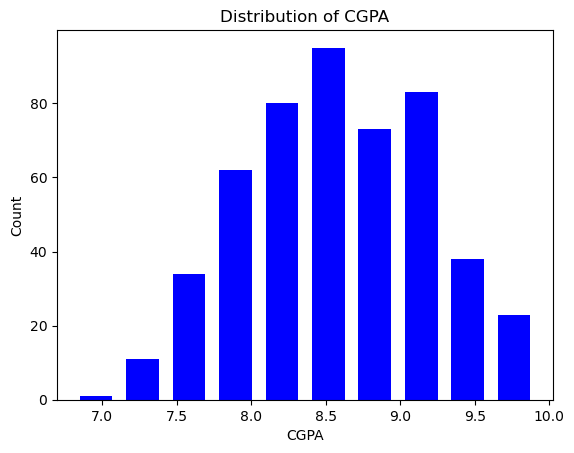

In [18]:
# Distribution of CGPA
plt.hist(df['CGPA'], rwidth=0.7, color='blue')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.title('Distribution of CGPA')
plt.show()

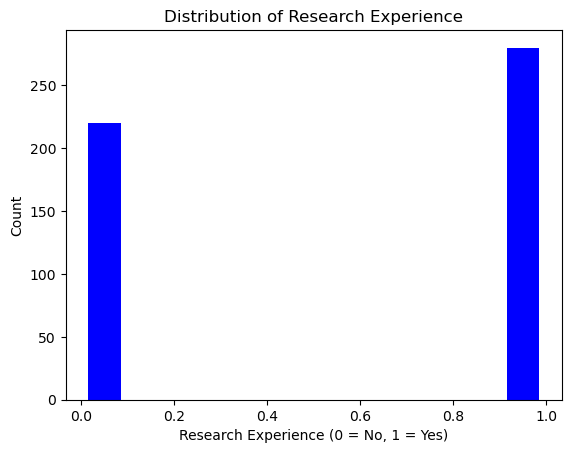

In [19]:
# Distribution of Research Experience
fig  = plt.hist(df['Research'], rwidth=0.7, color='blue')
plt.xlabel('Research Experience (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Research Experience')
plt.show()

In [20]:
# Drop the serial number column 
if 'Serial No.' in df.columns:
    df = df.drop('Serial No.', axis=1)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:

# Replace 0 values in specific columns with NaN
cols_to_replace = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

In [22]:
X = df.drop('Probability', axis=1)
y = df['Probability']

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


In [24]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [25]:
print(len(X_train))
print(len(X_test))

400
100


In [26]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: using R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.821478736588966


In [27]:

import pickle

# Assuming your trained model is named 'model'
# Save the model to a file

pickle.dump(model, open("model.pkl", 'wb'))

# Load the model from the file (example)
# loaded_model = pickle.load(open(filename, 'rb'))

In [28]:
import os
print("Current working directory:", os.getcwd())
os.chdir("c:/Users/muppa/Downloads/Probability of Getting Admission/template/")


Current working directory: c:\Users\muppa\Downloads\Probability of Getting Admission\template


In [29]:
import pickle

# Assuming your trained model is named 'model'
# Save the model to a file

pickle.dump(model, open("lrmodel.pkl", 'wb'))

In [30]:
import os
print("Saving model to:", os.getcwd())
pickle.dump(model, open("lrmodel.pkl", 'wb'))



Saving model to: c:\Users\muppa\Downloads\Probability of Getting Admission\template
